In [1]:
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt
import PIL.Image

In [2]:
import os
os.chdir('stylegan2-ada-pytorch')

In [3]:
# w = np.load('out/projected_w.npz')
# w = w['w']
# w = torch.tensor(w)
w = torch.rand([1, 18, 512]).to('cuda')
w.shape

torch.Size([1, 18, 512])

In [4]:
# Load model architecture
with open('../../metfaces.pkl', 'rb') as f:
    architecture = pickle.load(f)
    G = architecture['G_ema'].cuda()  # torch.nn.Module 
    D = architecture['D'].cuda()

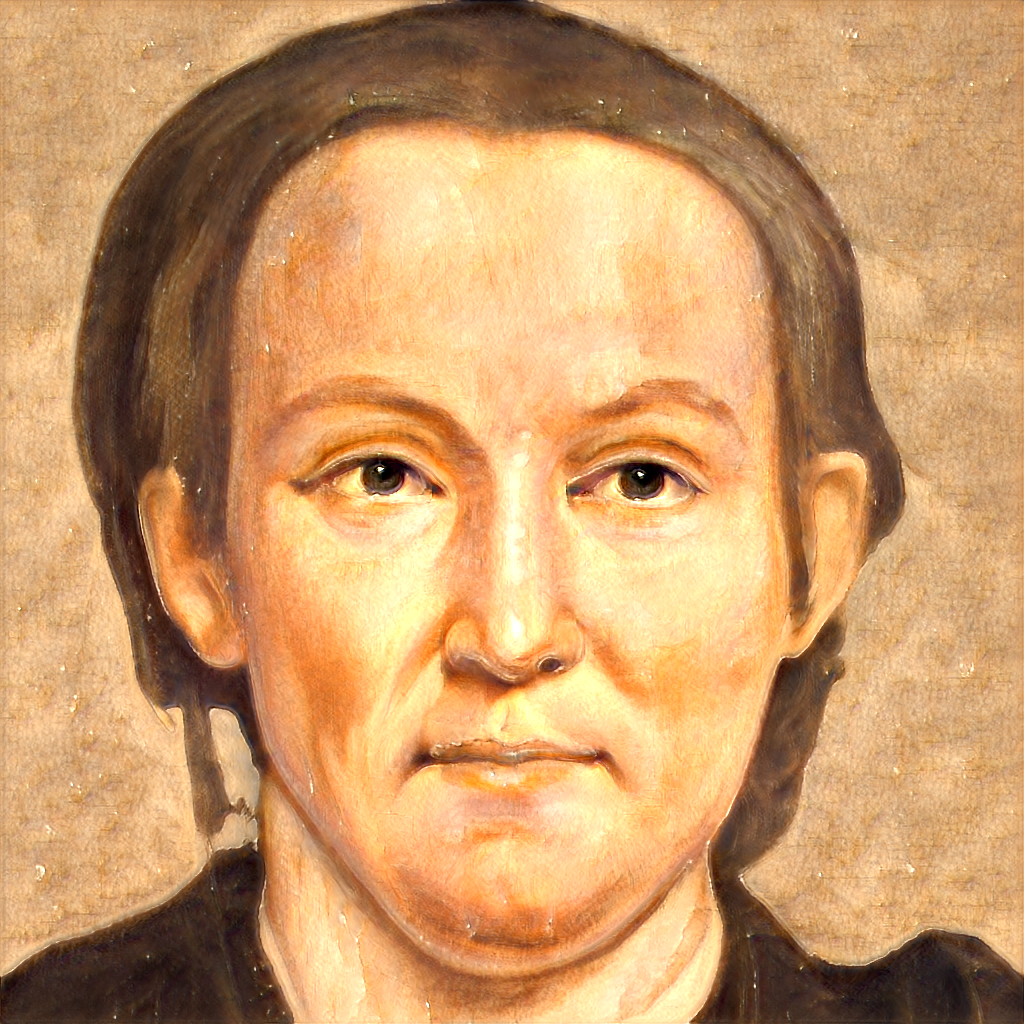

In [6]:
# Generate image using w space
img = G.synthesis(w, noise_mode='const', force_fp32=True)
# Show image
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')